## Introduction to Scikit-learn

#### Scikit-kearn design
* Object Oriented
* Consistency
* Inspection
* Non-proliferation of classes
* Composition
* Sensible Defaults



### Consistency of design
* Estimators (fit method for training using a standard ML algorithm)
* Transformers (transform method to filter or change the dataset in some way)
* Predictors (predict, predict_proba etc. to predict using the trained model on new examples)
* fit_transform method combines fit and transform
* score method (for performance evaluation)

### Inspection
* Learned parameters
* Hyper-parameters
* Statistics

### Scikit component libraries
* Datasets
* Model selection utilities 
* Preprocessing 
* Common Supervised and Un-supervised models and algorithms
* Metrics
* Feature Selection
* Pipelines and workflow definition
* Text Analysis utilities

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm
%matplotlib inline

In [10]:
fruits = pd.read_table('datasets/fruit_data.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
labels = fruits.fruit_label.unique()
names = fruits.fruit_name.unique()
labels,names

(array([1, 2, 3, 4], dtype=int64),
 array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object))

In [12]:
lookup_fruit_name = dict(zip(labels,names ))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [15]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

C:\Users\MASTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


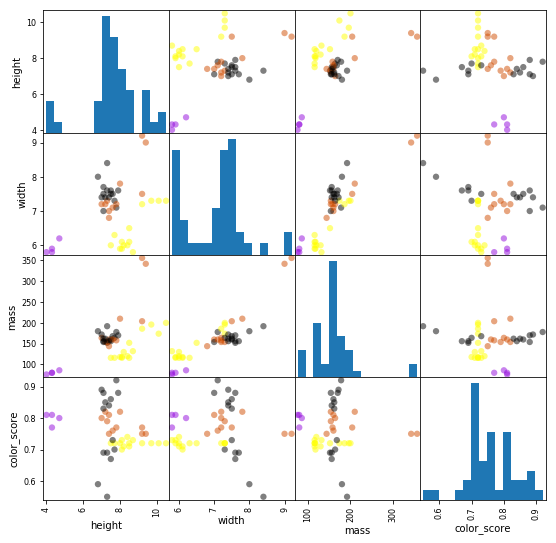

In [13]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [66]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [69]:
knn.score(X_test, y_test)

0.6

In [70]:
# smaller fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])

In [71]:
fruit_prediction

array([2], dtype=int64)

In [72]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [73]:
# elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [76]:
def knn_acc_with_k(X_train,y_train, X_test, y_test,plt,k_range=10):
    train_accuracy = []
    test_accuracy = []
    neighbors = range(1, k_range+1)
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        train_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))
    plt.plot(neighbors, train_accuracy, label="train accuracy")
    plt.plot(neighbors, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("neighbors")
    plt.legend()

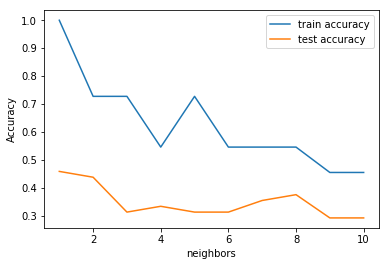

In [79]:
knn_acc_with_k(X_train,y_train,X_test,y_test,plt,k_range=10)

In [83]:
def knn_acc_with_split(X,y,splits,plt,neighbors=5):

    knn = KNeighborsClassifier(n_neighbors = neighbors)

    plt.figure()

    for s in splits:
        scores = []
        for i in range(1,1000):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
            knn.fit(X_train, y_train)
            scores.append(knn.score(X_test, y_test))
        plt.plot(s, np.mean(scores), 'bo')

    plt.xlabel('Training set proportion (%)')
    plt.ylabel('accuracy')

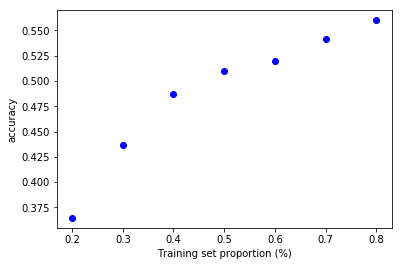

In [82]:
knn_acc_with_split([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2],plt)